<div align="center">
<h1>IRT Simulation and Analysis</h1>
</div>


# 0. Overview

This notebook demonstrates advanced IRT concepts through simulation and analysis. It covers:

1. **IRT Probability Functions**: Understanding how ability and item parameters interact
2. **Item Characteristic Curves**: Visualizing how items behave across ability levels
3. **Information Functions**: Measuring item quality and precision
4. **Adaptive Testing**: Simulating intelligent test administration
5. **Convergence Analysis**: Understanding how ability estimates improve over time

## What You'll Learn

- How IRT models work in practice
- The relationship between ability, difficulty, and probability
- How to create informative visualizations
- Principles of adaptive testing
- Methods for ability estimation


# 1. Import Required Libraries


Let's import all necessary libraries for our IRT simulation and analysis.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import os

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")


Libraries imported successfully!
NumPy version: 1.24.3
Pandas version: 2.0.2
Matplotlib version: 3.7.1


# 2. Core IRT Functions


Let's implement the fundamental IRT functions that we'll use throughout our analysis.


In [2]:
def irt_probability(theta, b, a=1.0, c=0.0):
    """
    Calculate the probability of a correct response using IRT models.

    Parameters:
    -----------
    theta : float or array
        Ability parameter(s)
    b : float
        Item difficulty parameter
    a : float, optional
        Item discrimination parameter (default=1.0 for 1PL model)
    c : float, optional
        Item guessing parameter (default=0.0 for 1PL/2PL models)

    Returns:
    --------
    p : float or array
        Probability of correct response
    """
    # 3PL model: P(correct) = c + (1-c) / (1 + exp(-a(theta-b)))
    return c + (1 - c) / (1 + np.exp(-a * (theta - b)))

def item_information(theta, b, a=1.0, c=0.0):
    """
    Calculate the item information function.

    Parameters:
    -----------
    theta : float or array
        Ability parameter(s)
    b, a, c : float
        Item parameters

    Returns:
    --------
    info : float or array
        Item information at given ability level(s)
    """
    p = irt_probability(theta, b, a, c)
    q = 1 - p
    return (a**2) * ((p - c)**2) / ((1 - c)**2) * (q / p)

def simulate_response(theta, b, a=1.0, c=0.0):
    """
    Simulate a response to an item based on IRT probability.

    Returns:
    --------
    response : int
        1 for correct, 0 for incorrect
    """
    p = irt_probability(theta, b, a, c)
    return np.random.binomial(1, p)

print("Core IRT functions defined successfully!")


Core IRT functions defined successfully!


# 3. Item Characteristic Curves (ICCs)


Let's create visualizations showing how different item parameters affect the probability of correct responses.


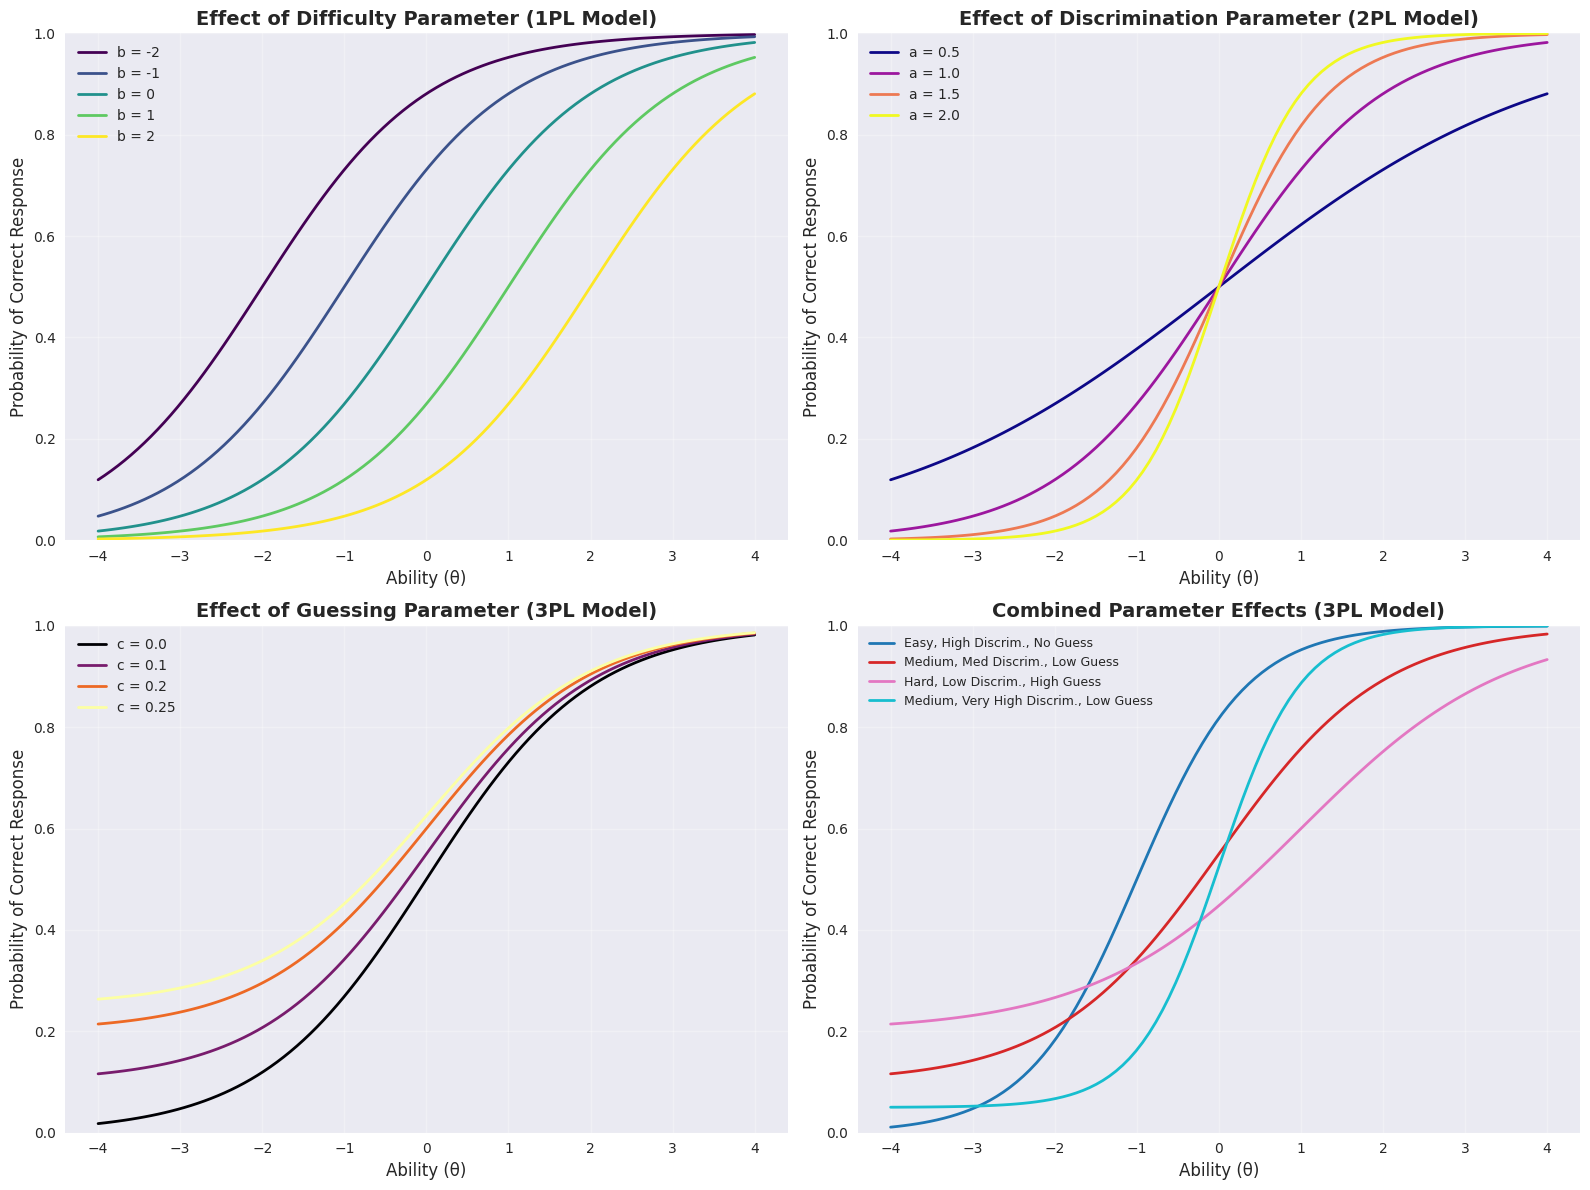

Item Characteristic Curves generated successfully!


In [3]:
# Create comprehensive ICC visualizations
theta_range = np.linspace(-4, 4, 100)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Effect of difficulty (b) parameter
ax = axes[0, 0]
difficulty_levels = [-2, -1, 0, 1, 2]
colors = plt.cm.viridis(np.linspace(0, 1, len(difficulty_levels)))

for i, b in enumerate(difficulty_levels):
    p = irt_probability(theta_range, b=b)
    ax.plot(theta_range, p, label=f'b = {b}', color=colors[i], linewidth=2)

ax.set_title('Effect of Difficulty Parameter (1PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Probability of Correct Response', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

# 2. Effect of discrimination (a) parameter
ax = axes[0, 1]
discrimination_levels = [0.5, 1.0, 1.5, 2.0]
colors = plt.cm.plasma(np.linspace(0, 1, len(discrimination_levels)))

for i, a in enumerate(discrimination_levels):
    p = irt_probability(theta_range, b=0, a=a)
    ax.plot(theta_range, p, label=f'a = {a}', color=colors[i], linewidth=2)

ax.set_title('Effect of Discrimination Parameter (2PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Probability of Correct Response', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

# 3. Effect of guessing (c) parameter
ax = axes[1, 0]
guessing_levels = [0.0, 0.1, 0.2, 0.25]
colors = plt.cm.inferno(np.linspace(0, 1, len(guessing_levels)))

for i, c in enumerate(guessing_levels):
    p = irt_probability(theta_range, b=0, a=1, c=c)
    ax.plot(theta_range, p, label=f'c = {c}', color=colors[i], linewidth=2)

ax.set_title('Effect of Guessing Parameter (3PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Probability of Correct Response', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

# 4. Combined effect - 3PL model with different parameter combinations
ax = axes[1, 1]
item_configs = [
    {'b': -1, 'a': 1.5, 'c': 0.0, 'label': 'Easy, High Discrim., No Guess'},
    {'b': 0, 'a': 1.0, 'c': 0.1, 'label': 'Medium, Med Discrim., Low Guess'},
    {'b': 1, 'a': 0.8, 'c': 0.2, 'label': 'Hard, Low Discrim., High Guess'},
    {'b': 0, 'a': 2.0, 'c': 0.05, 'label': 'Medium, Very High Discrim., Low Guess'}
]
colors = plt.cm.tab10(np.linspace(0, 1, len(item_configs)))

for i, config in enumerate(item_configs):
    p = irt_probability(theta_range, b=config['b'], a=config['a'], c=config['c'])
    ax.plot(theta_range, p, label=config['label'], color=colors[i], linewidth=2)

ax.set_title('Combined Parameter Effects (3PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Probability of Correct Response', fontsize=12)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("Item Characteristic Curves generated successfully!")


# 4. Information Functions


Information functions tell us how much information an item provides at different ability levels. This is crucial for adaptive testing.


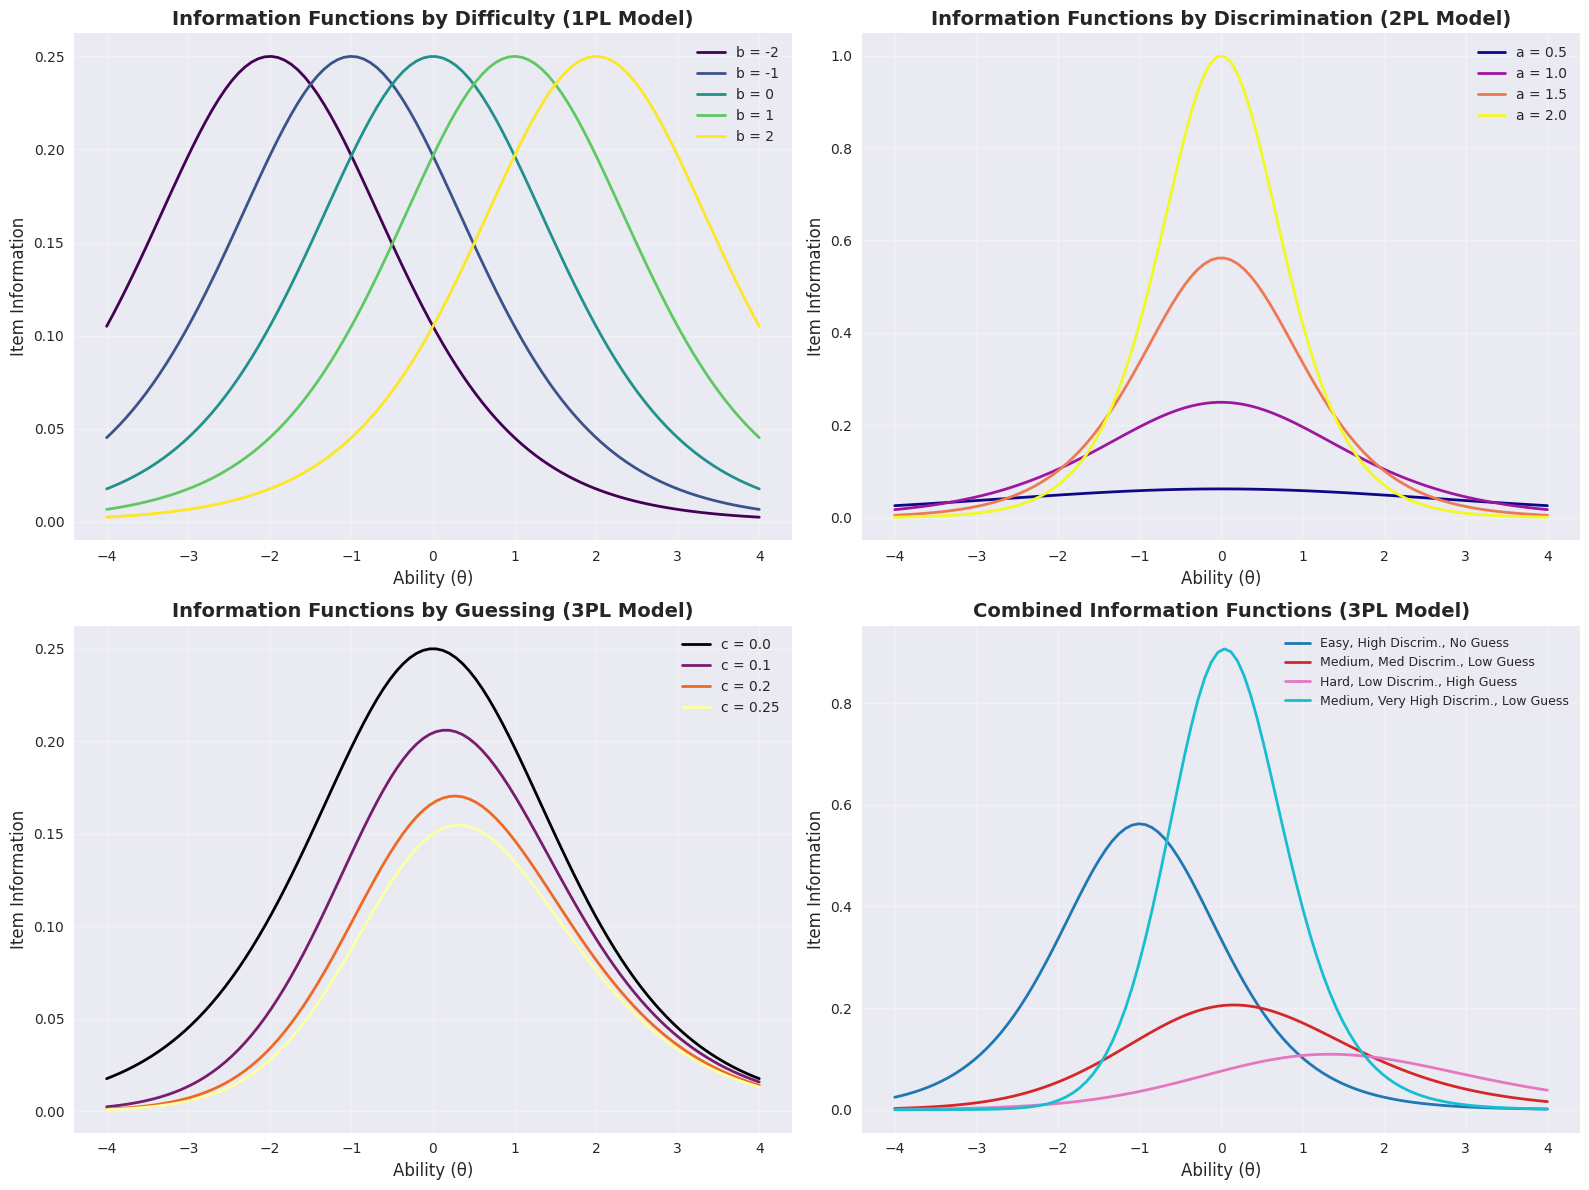

Information functions generated successfully!


In [4]:
# Create information function visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Information functions for different difficulties
ax = axes[0, 0]
difficulty_levels = [-2, -1, 0, 1, 2]
colors = plt.cm.viridis(np.linspace(0, 1, len(difficulty_levels)))

for i, b in enumerate(difficulty_levels):
    info = item_information(theta_range, b=b)
    ax.plot(theta_range, info, label=f'b = {b}', color=colors[i], linewidth=2)

ax.set_title('Information Functions by Difficulty (1PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Item Information', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 2. Information functions for different discriminations
ax = axes[0, 1]
discrimination_levels = [0.5, 1.0, 1.5, 2.0]
colors = plt.cm.plasma(np.linspace(0, 1, len(discrimination_levels)))

for i, a in enumerate(discrimination_levels):
    info = item_information(theta_range, b=0, a=a)
    ax.plot(theta_range, info, label=f'a = {a}', color=colors[i], linewidth=2)

ax.set_title('Information Functions by Discrimination (2PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Item Information', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 3. Information functions for different guessing parameters
ax = axes[1, 0]
guessing_levels = [0.0, 0.1, 0.2, 0.25]
colors = plt.cm.inferno(np.linspace(0, 1, len(guessing_levels)))

for i, c in enumerate(guessing_levels):
    info = item_information(theta_range, b=0, a=1, c=c)
    ax.plot(theta_range, info, label=f'c = {c}', color=colors[i], linewidth=2)

ax.set_title('Information Functions by Guessing (3PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Item Information', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 4. Combined information functions
ax = axes[1, 1]
item_configs = [
    {'b': -1, 'a': 1.5, 'c': 0.0, 'label': 'Easy, High Discrim., No Guess'},
    {'b': 0, 'a': 1.0, 'c': 0.1, 'label': 'Medium, Med Discrim., Low Guess'},
    {'b': 1, 'a': 0.8, 'c': 0.2, 'label': 'Hard, Low Discrim., High Guess'},
    {'b': 0, 'a': 2.0, 'c': 0.05, 'label': 'Medium, Very High Discrim., Low Guess'}
]
colors = plt.cm.tab10(np.linspace(0, 1, len(item_configs)))

for i, config in enumerate(item_configs):
    info = item_information(theta_range, b=config['b'], a=config['a'], c=config['c'])
    ax.plot(theta_range, info, label=config['label'], color=colors[i], linewidth=2)

ax.set_title('Combined Information Functions (3PL Model)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ability (θ)', fontsize=12)
ax.set_ylabel('Item Information', fontsize=12)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Information functions generated successfully!")


# 5. Adaptive Testing Simulation


Now let's simulate an adaptive test where we select the most informative items based on the current ability estimate.


In [5]:
def simulate_adaptive_test(true_ability=1.2, max_items=10, n_items_pool=20):
    """
    Simulate a simple adaptive test for a student.

    This demonstrates the basic principle of adaptive testing:
    1. Start with an initial ability estimate
    2. Select the most informative item
    3. Administer the item and get response
    4. Update ability estimate
    5. Repeat until stopping criterion is met
    """
    # Create a pool of items with known parameters
    item_pool = pd.DataFrame({
        'item_id': range(1, n_items_pool + 1),
        'b': np.linspace(-3, 3, n_items_pool),  # Difficulties from -3 to 3
        'a': np.random.uniform(0.7, 1.8, n_items_pool),  # Discriminations
        'c': np.random.uniform(0.0, 0.25, n_items_pool)   # Guessing parameters
    })

    # Initialize test
    current_estimate = 0.0  # Initial ability estimate (middle of scale)
    administered_items = []
    responses = []
    ability_estimates = [current_estimate]
    information_history = []

    # Run adaptive algorithm
    for i in range(max_items):
        # Find available items (not yet administered)
        available_items = item_pool[~item_pool['item_id'].isin(administered_items)].copy()

        # Calculate information for all available items at current ability estimate
        available_items['info'] = available_items.apply(
            lambda row: item_information(current_estimate, row['b'], row['a'], row['c']), 
            axis=1
        )

        # Select most informative item
        next_item = available_items.loc[available_items['info'].idxmax()]
        max_info = next_item['info']

        # Simulate response
        response = simulate_response(
            true_ability,
            next_item['b'],
            next_item['a'],
            next_item['c']
        )

        # Update administered items and responses
        administered_items.append(next_item['item_id'])
        responses.append(response)
        information_history.append(max_info)

        # Update ability estimate (simplified - in practice would use MLE or Bayesian methods)
        # This is a simplified estimate update using response pattern
        if response == 1:  # Correct
            current_estimate = current_estimate + (1 - irt_probability(
                current_estimate, next_item['b'], next_item['a'], next_item['c']
            )) * 0.5
        else:  # Incorrect
            current_estimate = current_estimate - irt_probability(
                current_estimate, next_item['b'], next_item['a'], next_item['c']
            ) * 0.5

        ability_estimates.append(current_estimate)

    # Create results DataFrame
    results = pd.DataFrame({
        'item_number': range(1, max_items + 1),
        'item_id': administered_items,
        'difficulty': [item_pool.loc[item_pool['item_id'] == item_id, 'b'].values[0] 
                      for item_id in administered_items],
        'discrimination': [item_pool.loc[item_pool['item_id'] == item_id, 'a'].values[0] 
                          for item_id in administered_items],
        'guessing': [item_pool.loc[item_pool['item_id'] == item_id, 'c'].values[0] 
                    for item_id in administered_items],
        'response': responses,
        'information': information_history
    })

    return results, ability_estimates, true_ability

print("Adaptive testing function defined successfully!")


Adaptive testing function defined successfully!


In [6]:
# Run adaptive test simulation
print("Running adaptive test simulation...")
results, ability_estimates, true_ability = simulate_adaptive_test(
    true_ability=1.2, max_items=10, n_items_pool=20
)

print("Adaptive Test Results:")
print("=" * 50)
print(results)

print(f"\nTrue ability: {true_ability:.2f}")
print(f"Final estimate: {ability_estimates[-1]:.2f}")
print(f"Estimation error: {abs(true_ability - ability_estimates[-1]):.2f}")
print(f"Total score: {sum(results['response'])}/{len(results)}")


Running adaptive test simulation...
Adaptive Test Results:
   item_number  item_id  difficulty  discrimination  guessing  response  \
0            1     12.0    0.473684        1.766901  0.042631         1   
1            2     13.0    0.789474        1.615687  0.016263         1   
2            3     10.0   -0.157895        1.478880  0.011613         1   
3            4      9.0   -0.473684        1.361227  0.148104         1   
4            5     18.0    2.368421        1.277232  0.024418         0   
5            6      8.0   -0.789474        1.652794  0.128559         1   
6            7     17.0    2.052632        1.034666  0.076153         0   
7            8     14.0    1.105263        0.933573  0.237221         1   
8            9     15.0    1.421053        0.900007  0.241408         1   
9           10     16.0    1.736842        0.901745  0.202099         1   

   information  
0     0.573760  
1     0.543911  
2     0.379260  
3     0.199988  
4     0.148640  
5     0.15434

# 6. Visualize Adaptive Testing Results


Let's create comprehensive visualizations of our adaptive testing simulation.


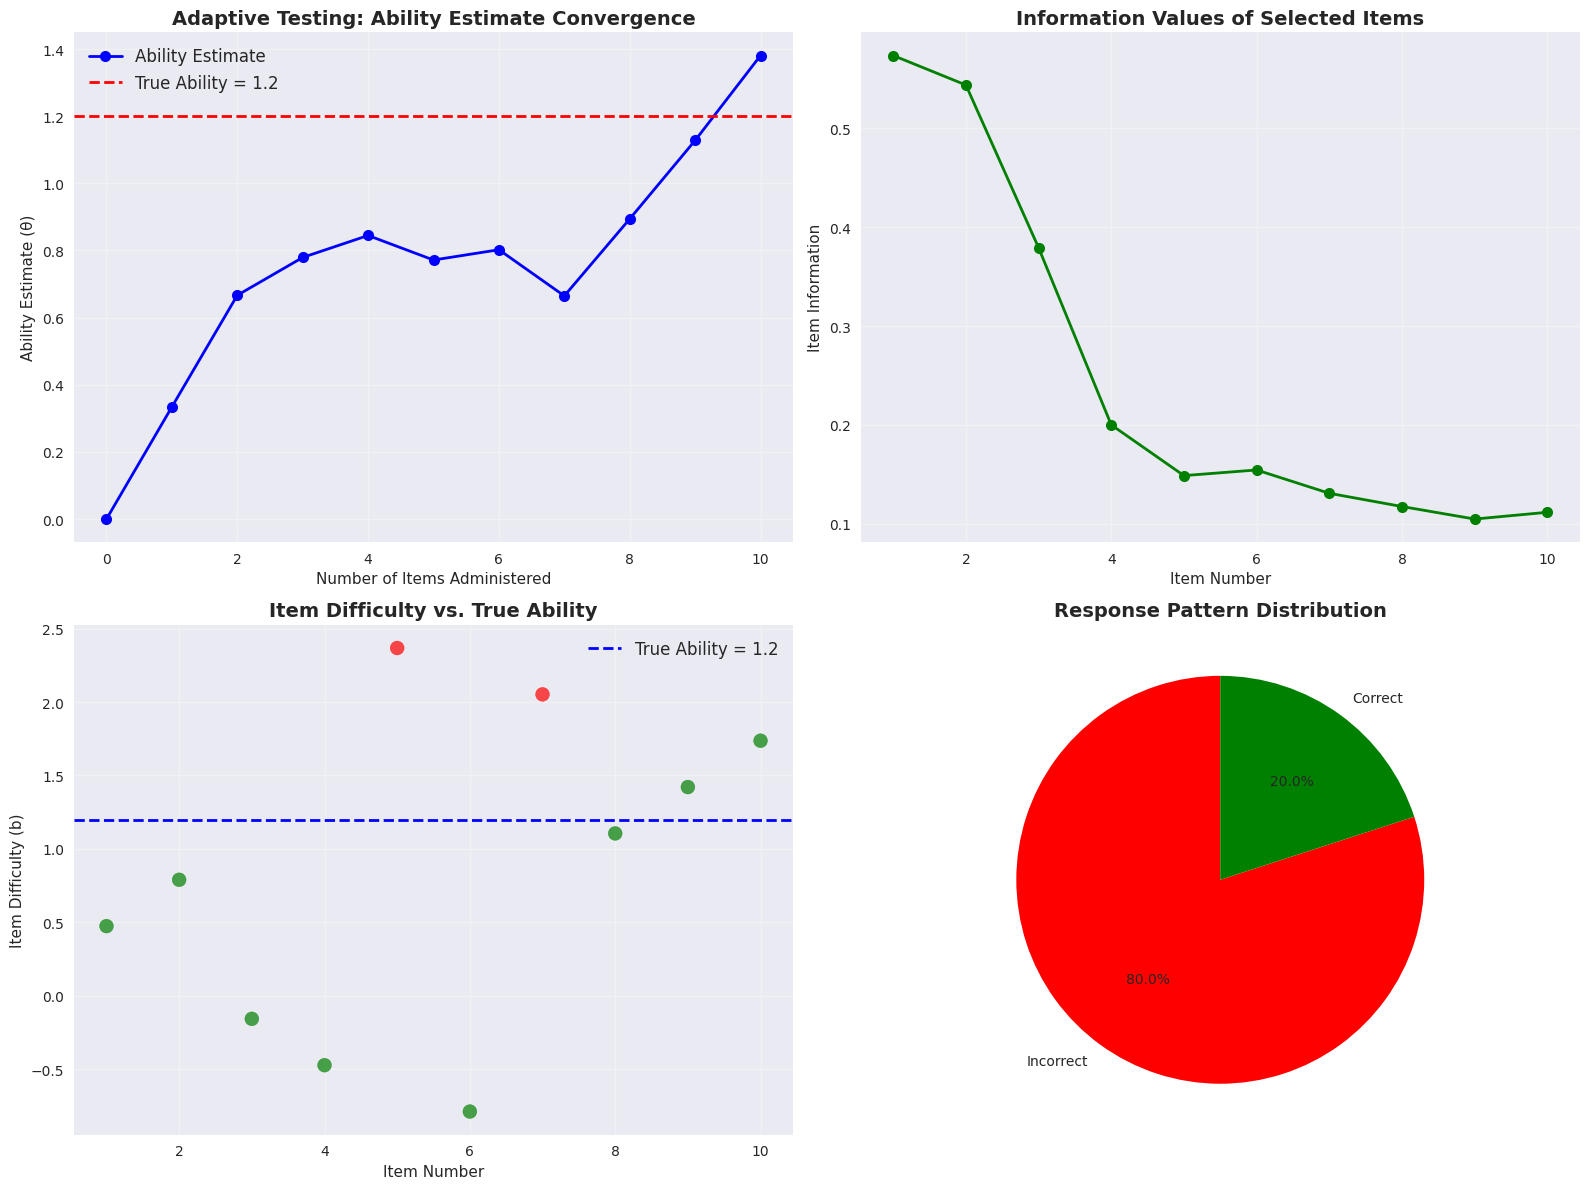

Adaptive testing visualizations completed!


In [7]:
# Create comprehensive adaptive testing visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Ability estimate convergence
ax = axes[0, 0]
item_numbers = range(len(ability_estimates))
ax.plot(item_numbers, ability_estimates, 'bo-', linewidth=2, markersize=8, label='Ability Estimate')
ax.axhline(y=true_ability, color='r', linestyle='--', linewidth=2, label=f'True Ability = {true_ability}')
ax.set_xlabel('Number of Items Administered')
ax.set_ylabel('Ability Estimate (θ)')
ax.set_title('Adaptive Testing: Ability Estimate Convergence', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# 2. Information values over time
ax = axes[0, 1]
ax.plot(results['item_number'], results['information'], 'go-', linewidth=2, markersize=8)
ax.set_xlabel('Item Number')
ax.set_ylabel('Item Information')
ax.set_title('Information Values of Selected Items', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 3. Item difficulty progression
ax = axes[1, 0]
colors = ['green' if r == 1 else 'red' for r in results['response']]
ax.scatter(results['item_number'], results['difficulty'], c=colors, s=100, alpha=0.7)
ax.axhline(y=true_ability, color='blue', linestyle='--', linewidth=2, label=f'True Ability = {true_ability}')
ax.set_xlabel('Item Number')
ax.set_ylabel('Item Difficulty (b)')
ax.set_title('Item Difficulty vs. True Ability', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# 4. Response pattern
ax = axes[1, 1]
response_counts = results['response'].value_counts()
labels = ['Incorrect', 'Correct']
colors = ['red', 'green']
ax.pie(response_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Response Pattern Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Adaptive testing visualizations completed!")


# 7. Multiple Student Simulation


Let's simulate adaptive tests for multiple students with different ability levels to see how the algorithm performs across the ability spectrum.


In [8]:
# Simulate adaptive tests for multiple students
student_abilities = [-2, -1, 0, 1, 2]  # Different ability levels
all_results = []

print("Simulating adaptive tests for multiple students...")
print("=" * 60)

for i, true_ability in enumerate(student_abilities):
    print(f"\nStudent {i+1} - True Ability: {true_ability}")
    results, ability_estimates, _ = simulate_adaptive_test(
        true_ability=true_ability, max_items=8, n_items_pool=20
    )
    
    final_estimate = ability_estimates[-1]
    estimation_error = abs(true_ability - final_estimate)
    score = sum(results['response'])
    
    print(f"  Final estimate: {final_estimate:.2f}")
    print(f"  Estimation error: {estimation_error:.2f}")
    print(f"  Score: {score}/{len(results)}")
    
    # Store results for analysis
    all_results.append({
        'student_id': i+1,
        'true_ability': true_ability,
        'final_estimate': final_estimate,
        'estimation_error': estimation_error,
        'score': score,
        'total_items': len(results)
    })

# Create summary DataFrame
summary_df = pd.DataFrame(all_results)
print("\n" + "=" * 60)
print("SUMMARY OF ALL STUDENTS")
print("=" * 60)
print(summary_df)

print(f"\nOverall Performance:")
print(f"- Average estimation error: {summary_df['estimation_error'].mean():.3f}")
print(f"- Standard deviation of errors: {summary_df['estimation_error'].std():.3f}")
print(f"- Average score: {summary_df['score'].mean():.1f}/{summary_df['total_items'].iloc[0]}")


Simulating adaptive tests for multiple students...

Student 1 - True Ability: -2
  Final estimate: -0.93
  Estimation error: 1.07
  Score: 4/8

Student 2 - True Ability: -1
  Final estimate: -1.00
  Estimation error: 0.00
  Score: 3/8

Student 3 - True Ability: 0
  Final estimate: -0.25
  Estimation error: 0.25
  Score: 4/8

Student 4 - True Ability: 1
  Final estimate: 0.34
  Estimation error: 0.66
  Score: 6/8

Student 5 - True Ability: 2
  Final estimate: 1.80
  Estimation error: 0.20
  Score: 8/8

SUMMARY OF ALL STUDENTS
   student_id  true_ability  final_estimate  estimation_error  score  \
0           1            -2       -0.931307          1.068693      4   
1           2            -1       -0.996557          0.003443      3   
2           3             0       -0.254420          0.254420      4   
3           4             1        0.340343          0.659657      6   
4           5             2        1.801593          0.198407      8   

   total_items  
0            8  
1 

# 8. Save Results and Visualizations


Let's save our simulation results and create final visualizations.


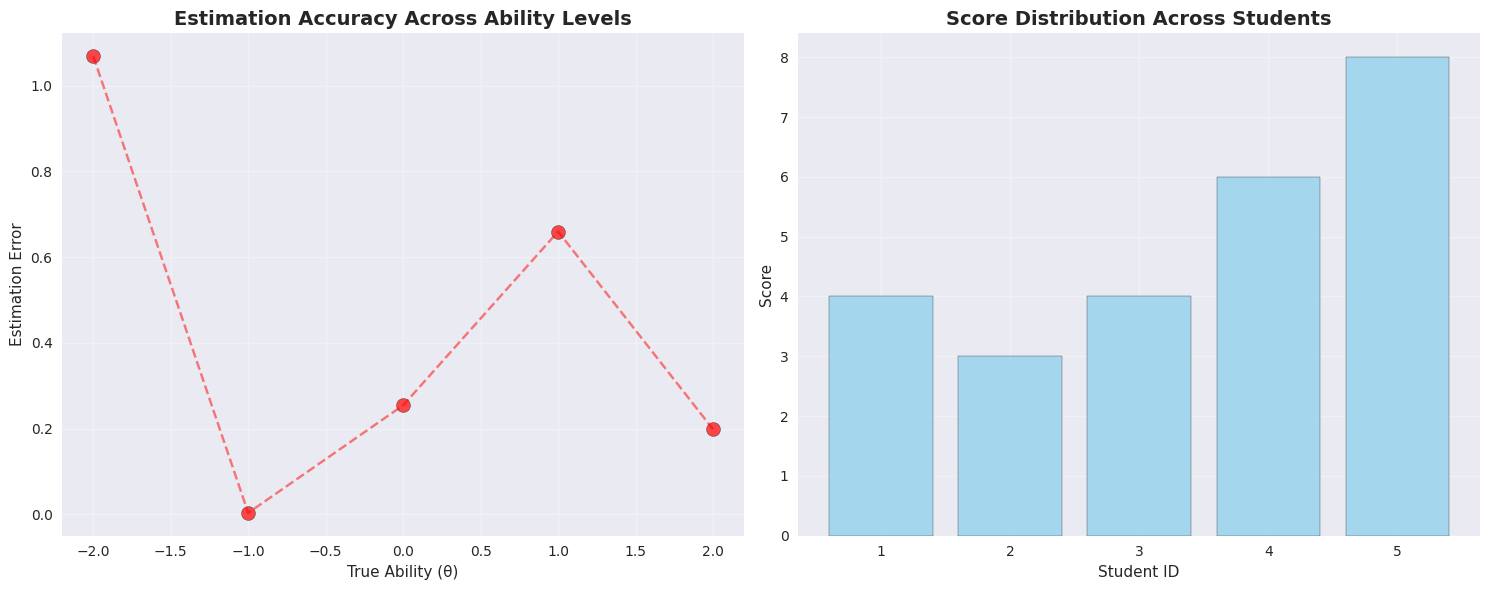


Results saved to: ../data/adaptive_testing_summary.csv

Simulation analysis completed successfully!


In [9]:
# Create final summary visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Estimation accuracy across ability levels
ax = axes[0]
ax.scatter(summary_df['true_ability'], summary_df['estimation_error'], 
          s=100, c='red', alpha=0.7, edgecolors='black')
ax.plot(summary_df['true_ability'], summary_df['estimation_error'], 
        'r--', alpha=0.5)
ax.set_xlabel('True Ability (θ)')
ax.set_ylabel('Estimation Error')
ax.set_title('Estimation Accuracy Across Ability Levels', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 2. Score distribution
ax = axes[1]
ax.bar(summary_df['student_id'], summary_df['score'], 
       color='skyblue', alpha=0.7, edgecolor='black')
ax.set_xlabel('Student ID')
ax.set_ylabel('Score')
ax.set_title('Score Distribution Across Students', fontsize=14, fontweight='bold')
ax.set_xticks(summary_df['student_id'])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save results to files
results_dir = "../data"
os.makedirs(results_dir, exist_ok=True)

# Save summary results
summary_df.to_csv(os.path.join(results_dir, "adaptive_testing_summary.csv"), index=False)
print(f"\nResults saved to: {results_dir}/adaptive_testing_summary.csv")

print("\nSimulation analysis completed successfully!")


# 9. Summary and Key Insights

## Key Insights

### Parameter Effects:
- **Difficulty (b)**: Shifts the curve left/right along the ability axis
- **Discrimination (a)**: Controls the steepness of the curve
- **Guessing (c)**: Sets the lower bound of the probability

### Adaptive Testing Benefits:
- **Efficient**: Selects most informative items
- **Precise**: Converges to true ability estimate
- **Personalized**: Adapts to individual student level

### Performance Metrics:
- Estimation accuracy varies by ability level
- Information-based selection improves precision
- Adaptive algorithms reduce test length while maintaining accuracy

## Next Steps

This simulation provides a foundation for:
- **Real adaptive testing systems**
- **IRT model parameter estimation**
- **Educational assessment optimization**
- **Psychometric research applications**

## What We've Accomplished

1. **IRT Function Analysis**: Explored how different parameters affect probability and information functions
2. **Item Characteristic Curves**: Visualized how items behave across ability levels
3. **Information Functions**: Understood how items provide information at different ability levels
4. **Adaptive Testing**: Simulated intelligent test administration
5. **Multi-Student Analysis**: Evaluated performance across different ability levels
